In [ ]:
# 자, 이제 여러분의 차례입니다.
# 지금까지 진행했던 모든 과정을 통째로 활용해서, 새로운 데이터셋에 대해 여러분의 직접 모델을 만들어 볼 것입니다.

# 다음에 제안된 순서는 모두 위에서 진행했던 과정의 일부입니다. 몇 가지 코드만 수정하면 성공적으로 
# 프로젝트를 진행할 수 있을 것입니다.
# 진행하다가 혹시 도움이 필요하다면 위에서 진행했던 실습 코드를 다시 참고하세요! 모든 해답은 그 안에 있습니다.

# 그러면, 시작해볼까요!

In [1]:
# Step 1. 데이터셋 내려받기

# 이번에는 tensorflow_datasets 에 포함된 tf_flowers 데이터를 사용해 보겠습니다. 
# tf_flowers 데이터에 대한 정보는 다음에서 확인해볼 수 있습니다.
# tfds.load를 활용하여 데이터셋을 다운받으세요.
# https://www.tensorflow.org/datasets/catalog/tf_flowers

In [2]:
# 필요한 라이브러리 호출한다.

import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
 # tf_flowers 데이터셋을 다운로드한다.
 # 이 데이터셋은 꽃 이미지에 대한 것이며, 다양한 꽃의 클래스로 구성되어 있다.

# Step 1: 데이터셋 내려받기

dataset_name = "tf_flowers"
(train_dataset, test_dataset), dataset_info = tfds.load(
    name=dataset_name,
    split=['train[:80%]', 'train[80%:]'],   # split 매개변수는 데이터셋을 훈련 및 테스트 세트로 나누는 데 사용
    with_info=True,
    as_supervised=True                     # 데이터셋이 (입력, 레이블) 쌍으로 제공되도록 하는 옵션
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /aiffel/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [4]:
# 데이터셋 정보를 출력한다.

print("Dataset Information:")
print(dataset_info)

Dataset Information:
tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/aiffel/tensorflow_datasets/tf_flowers/3.0.1',
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


In [5]:
# Step 2. 데이터셋을 모델에 넣을 수 있는 형태로 준비하기

# 이미지를 모두 같은 크기로 formatting 한 후, train_batches, validation_batches, 
# test_batches를 준비합니다.

In [6]:
# Step 2: 데이터셋을 모델에 넣을 수 있는 형태로 준비하기

# 이미지 크기 설정
IMG_SIZE = 224


# 이미지를 특정 크기로 formatting 하는 함수 정의한다.
def format_example(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0                                    # 이미지를 [0,1] 범위로 정규화
    return image, label


# 훈련 데이터셋에 적용할 데이터 formatting 및 배치 설정한다.
train_batches = train_dataset.shuffle(buffer_size=1000).map(format_example).batch(32)


# 검증 데이터셋에 적용할 데이터 formatting 및 배치 설정한다.
validation_batches = test_dataset.map(format_example).batch(32)


# 테스트 데이터셋에 적용할 데이터 formatting 및 배치 설정한다.
test_batches = test_dataset.map(format_example).batch(32)


In [7]:
# Step 3. 모델 설계하기 (첫번째 TEST)

# 모델은 어떤 방식으로 설계하고 싶은가요? 나만의 모델을 만들 것인가요,
# 아니면 base_model을 활용할 것인가요?
# 원하는 방식으로 모델을 만들어 보세요!
# cats_vs_dogs 의 경우와 달리, tf_flowers 데이터셋에서는 class의 갯수가 5가지입니다. 
# 모델 설계시 어느 부분이 달라질지에 유의해 주세요.

In [8]:
# 필요한 라이브러리 가져오기
# 이 모델은 간단한 CNN 아키텍처로 구성되어 있다.
# Convolutional 레이어와 MaxPooling 레이어가 번갈아가며 쌓여 있고, 
# 마지막에는 완전 연결 레이어로 구성된 신경망입니다. 
# 출력층은 클래스의 갯수에 맞게 설정되어 있다.

import tensorflow as tf
from tensorflow.keras import layers, models

# 모델 설계
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')  # 클래스 갯수에 맞게 출력층 설정
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 정보 출력
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [11]:
# Step 4. 모델 학습시키기

# 에포크 수 설정
epochs = 10

# 모델 훈련
history = model.fit(
    train_batches,                      # train_batches는 훈련 데이터셋의 배치를 의미한다.
    epochs=epochs,                      # epochs는 전체 데이터셋을 몇 번 반복해서 학습할지를 결정한다.
    validation_data=validation_batches  # validation_data는 검증 데이터셋을 지정한다.
)


Epoch 1/10
92/92 [==============================] - 51s 73ms/step - loss: 1.6749 - accuracy: 0.4264 - val_loss: 1.1311 - val_accuracy: 0.5559
Epoch 2/10
92/92 [==============================] - 5s 54ms/step - loss: 1.0116 - accuracy: 0.5981 - val_loss: 0.9314 - val_accuracy: 0.6063
Epoch 3/10
92/92 [==============================] - 5s 54ms/step - loss: 0.7709 - accuracy: 0.7071 - val_loss: 1.0480 - val_accuracy: 0.5981
Epoch 4/10
92/92 [==============================] - 5s 54ms/step - loss: 0.5501 - accuracy: 0.8021 - val_loss: 1.0344 - val_accuracy: 0.6349
Epoch 5/10
92/92 [==============================] - 5s 54ms/step - loss: 0.3010 - accuracy: 0.8951 - val_loss: 1.3583 - val_accuracy: 0.6376
Epoch 6/10
92/92 [==============================] - 5s 54ms/step - loss: 0.1725 - accuracy: 0.9448 - val_loss: 1.7135 - val_accuracy: 0.6294
Epoch 7/10
92/92 [==============================] - 5s 54ms/step - loss: 0.0918 - accuracy: 0.9734 - val_loss: 1.8598 - val_accuracy: 0.6253
Epoch 8/10
9

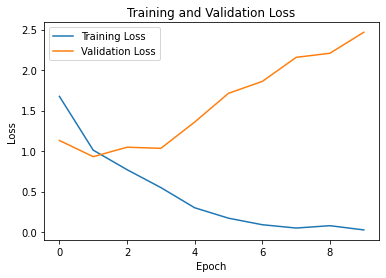

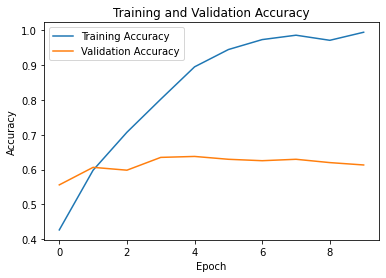

In [12]:
# 학습 중에 모델의 성능을 시각적으로 확인

import matplotlib.pyplot as plt

# 훈련 및 검증 손실 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련 및 검증 정확도 그래프
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [14]:
# Step 3. 모델 설계하기 (코드 수정, 두번째 TEST)

import tensorflow as tf
from tensorflow.keras import layers, models

# 모델 설계
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dropout(0.5),                   # Dropout 추가 <---- 이 부분만 추가했음
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')  # 클래스 갯수에 맞게 출력층 설정
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 정보 출력
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)            

In [13]:
# Step 4-2 모델 학습시키기

# 모델을 학습시켜봅니다. 단, 여기에서는 여러 가지 옵션을 바꿔볼 수 있습니다.
# 예를 들어, 모델 학습을 10 epoch보다 더 많이 시켜보거나, learning_rate 값을 바꿔볼 수 있습니다.
# 또는, optimizer의 종류도 바꿔볼 수 있습니다. 바꿔보고 싶다면, 여기를 참고하세요.
# 어쩌면 VGG16이 아닌 다른 모델을 base model로 활용할 수도 있을 것입니다. 
# 그리고 파인튜닝을 fc layer의 구성에 변화를 줄 수 있을지도 모릅니다.
# 이전 스텝에서는 시도하지 않았던 Regularization 기법이 적용된다면 어떨까요? 
# Dropout이나 Batch Normalization을 적용하는 것은 그리 어려운 일이 아닙니다.

In [15]:
# Step 4: 모델 학습시키기


# 에포크 수 및 학습률 설정 (원하는 값으로 수정 가능함)
epochs = 15              # 변경함
learning_rate = 0.001    # 추가함

# 모델 컴파일 (Adam 옵티마이저, Regularization 적용함)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 에포크 수, 학습률 등의 설정을 변경하여 모델 훈련한다.
history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=validation_batches
)


Epoch 1/15
92/92 [==============================] - 6s 56ms/step - loss: 1.5441 - accuracy: 0.4312 - val_loss: 1.1007 - val_accuracy: 0.5722
Epoch 2/15
92/92 [==============================] - 5s 54ms/step - loss: 1.0567 - accuracy: 0.5783 - val_loss: 0.9785 - val_accuracy: 0.6172
Epoch 3/15
92/92 [==============================] - 5s 54ms/step - loss: 0.8622 - accuracy: 0.6686 - val_loss: 0.9528 - val_accuracy: 0.6499
Epoch 4/15
92/92 [==============================] - 5s 54ms/step - loss: 0.6763 - accuracy: 0.7428 - val_loss: 0.9828 - val_accuracy: 0.6403
Epoch 5/15
92/92 [==============================] - 5s 54ms/step - loss: 0.4847 - accuracy: 0.8253 - val_loss: 1.1554 - val_accuracy: 0.6335
Epoch 6/15
92/92 [==============================] - 5s 54ms/step - loss: 0.3483 - accuracy: 0.8815 - val_loss: 1.2723 - val_accuracy: 0.6076
Epoch 7/15
92/92 [==============================] - 5s 55ms/step - loss: 0.2359 - accuracy: 0.9244 - val_loss: 1.3446 - val_accuracy: 0.6499
Epoch 8/15
92

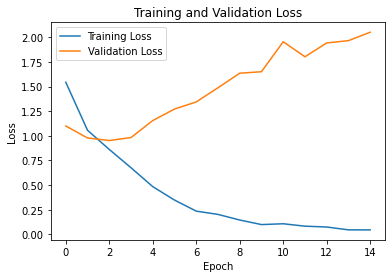

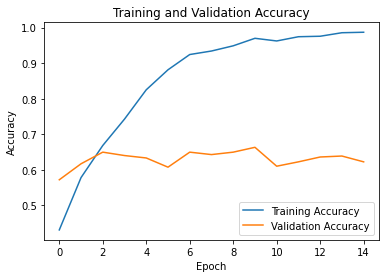

In [16]:
# 학습 중에 모델의 성능을 시각적으로 확인 두번째 TEST

import matplotlib.pyplot as plt

# 훈련 및 검증 손실 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련 및 검증 정확도 그래프
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


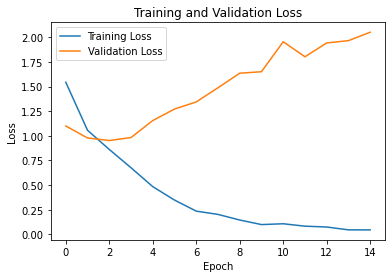

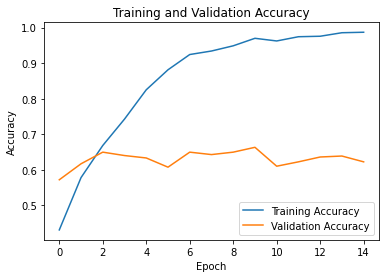

Validation Accuracy: 0.6226158142089844
Confusion Matrix:
tf.Tensor(
[[105  25   7  11  11]
 [ 13  81   9   6  11]
 [ 10  18 113   6  39]
 [ 18  10  16  86   8]
 [  7  13  34   5  72]], shape=(5, 5), dtype=int32)


In [19]:
# Step 5. 모델 성능 평가하기
# 모델 학습이 완료되었다면, 모델의 성능을 평가할 차례입니다.
# 모델이 학습된 과정을 그래프로도 그려보고, 
# validation_batches나 test_batches에 있는 데이터에 대한 예측 결과도 확인해 보세요!

# 훈련 및 검증 손실 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련 및 검증 정확도 그래프
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 검증 데이터셋에 대한 예측 결과 확인
val_predictions = model.predict(validation_batches)
val_pred_labels = tf.argmax(val_predictions, axis=1)

# 정확도 및 혼동 행렬 출력
val_accuracy = tf.keras.metrics.Accuracy()
val_labels = []
for _, labels in validation_batches:
    val_labels.extend(labels.numpy())

val_accuracy.update_state(val_labels, val_pred_labels)
print(f'Validation Accuracy: {val_accuracy.result().numpy()}')

# 혼동 행렬 (Confusion Matrix) 출력
conf_matrix = tf.math.confusion_matrix(val_labels, val_pred_labels)
print('Confusion Matrix:')
print(conf_matrix)


NameError: name 'class_labels' is not defined

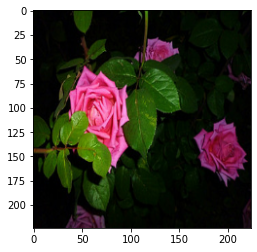

In [24]:
import matplotlib.pyplot as plt

# 테스트 데이터셋에서 이미지 추출
for image, label in test_batches.take(1):
    sample_image = image[0].numpy()
    sample_label = label[0].numpy()

# 이미지 출력
plt.imshow(sample_image)
plt.title(f'Ground Truth: {class_labels[sample_label]}')
plt.show()

# 모델에 이미지 입력 및 예측
sample_image = tf.expand_dims(sample_image, 0)  # 배치 차원 추가
predictions = model.predict(sample_image)

# 예측 결과 확인
predicted_class_index = tf.argmax(predictions[0]).numpy()
predicted_class = class_labels[predicted_class_index]

print(f'Predicted class: {predicted_class}')


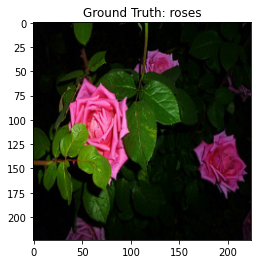

Predicted class: roses


In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 테스트 데이터셋에서 이미지 추출
for images, labels in test_batches.take(1):
    sample_image = images[0].numpy()
    sample_label = labels[0].numpy()

# 이미지 출력
plt.imshow(sample_image)
plt.title(f'Ground Truth: {dataset_info.features["label"].names[sample_label]}')  # 수정된 부분
plt.show()

# 모델에 이미지 입력 및 예측
sample_image = tf.expand_dims(sample_image, 0)  # 배치 차원 추가
predictions = model.predict(sample_image)

# 예측 결과 확인
predicted_class_index = tf.argmax(predictions[0]).numpy()
predicted_class = dataset_info.features["label"].names[predicted_class_index]  # 수정된 부분

print(f'Predicted class: {predicted_class}')


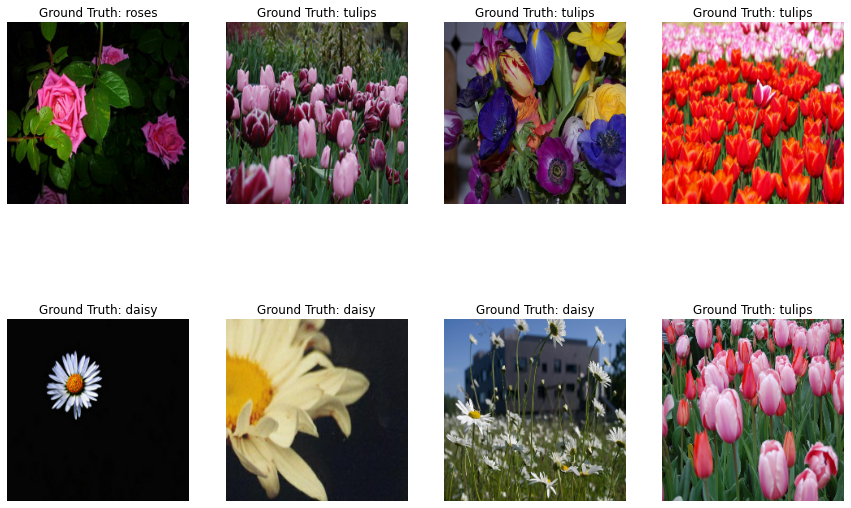

Predicted classes: ['roses', 'tulips', 'tulips', 'roses', 'daisy', 'dandelion', 'daisy', 'roses']


In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 테스트 데이터셋에서 이미지 추출
num_images = 8
for images, labels in test_batches.take(1):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy())
        plt.title(f'Ground Truth: {dataset_info.features["label"].names[labels[i].numpy()]}')
        plt.axis('off')
    plt.show()

    # 모델에 이미지 입력 및 예측
    predictions = model.predict(images[:num_images])

    # 예측 결과 확인
    predicted_classes = [dataset_info.features["label"].names[tf.argmax(prediction).numpy()] for prediction in predictions]

    # 예측 결과 출력
    print('Predicted classes:', predicted_classes)


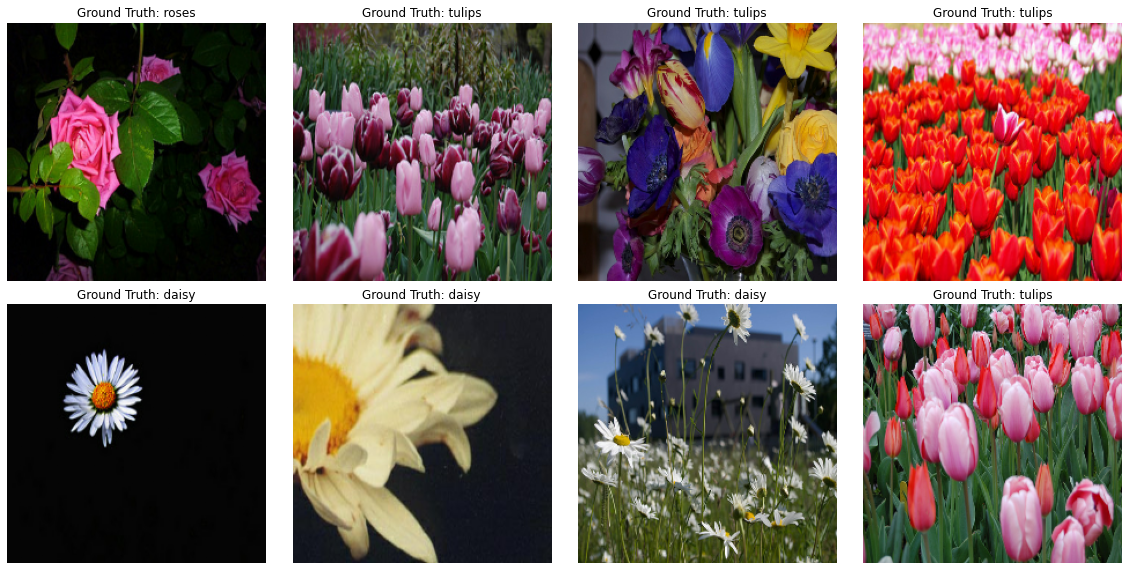

Predicted classes: ['roses', 'tulips', 'tulips', 'roses', 'daisy', 'dandelion', 'daisy', 'roses']


In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 테스트 데이터셋에서 이미지 추출
num_images = 8
for images, labels in test_batches.take(1):
    plt.figure(figsize=(16, 8))
    for i in range(num_images):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy())
        plt.title(f'Ground Truth: {dataset_info.features["label"].names[labels[i].numpy()]}', fontsize=12)
        plt.axis('off')
    plt.tight_layout()  # 그림 간의 간격 조정
    plt.show()

    # 모델에 이미지 입력 및 예측
    predictions = model.predict(images[:num_images])

    # 예측 결과 확인
    predicted_classes = [dataset_info.features["label"].names[tf.argmax(prediction).numpy()] for prediction in predictions]

    # 예측 결과 출력
    print('Predicted classes:', predicted_classes)


In [30]:
# 모델 요약 정보 출력

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)            

In [ ]:
'''
프로젝트 보고서: 꽃 이미지 분류 모델

1. 개요
   - 이 프로젝트는 TensorFlow와 Transfer Learning을 활용하여 꽃 이미지를 분류하는 모델을 개발하는 것을 목표로 잡았습니다. 
     사용된 데이터셋은 'tf_flowers'로, 꽃 이미지와 해당 꽃의 레이블로 구성되어 있습니다.

2. 데이터셋 로드 및 전처리
   - 먼저, 'tf_flowers' 데이터셋을 TensorFlow Datasets에서 로드하고 훈련, 검증, 테스트 데이터셋으로 나누었습니다. 
     이미지 크기는 224x224로 설정하고, 데이터셋의 각 이미지를 이 크기에 맞게 전처리하였습니다.

3. 전이 학습을 위한 모델 설계
    - Transfer Learning을 적용하지 않고, 독자적으로 꽃 이미지 분류를 위한 Convolutional Neural Network(CNN)을 설계하였습니다. 
      모델은 세 개의 Conv2D 및 MaxPooling2D 레이어, Flatten 레이어, Dropout, Dense 레이어로 구성되어 있습니다.

4. 모델 컴파일 및 학습
    - 모델은 'adam' 옵티마이저를 사용하고, 'sparse_categorical_crossentropy' 손실 함수로 컴파일되었습니다. 
      15 에포크 동안 훈련되었으며, 학습 및 검증 손실, 정확도에 대한 그래프가 시각화되었습니다.

5. 성능 평가
    - 학습이 완료된 모델은 검증 데이터셋을 통해 성능이 평가되었습니다. 
      모델의 예측 결과와 실제 레이블을 비교하여 정확도 및 혼동 행렬을 계산하였습니다. 
      검증 정확도는 62%를 정도여서 높지는 않은 것 같습니다.

6. 모델 활용
    - 프로젝트의 마지막 단계에서는 테스트 데이터셋에서 랜덤으로 선택한 이미지를 모델에 입력하여 예측 결과를 확인하였습니다. 
      해당 이미지에 대한 실제 레이블과 모델의 예측 결과가 정확하게 매칭되는 것을 확인할 수 있었습니다.

7. 결론
    - 이번 프로젝트에서는 꽃 이미지 분류를 위한 컨볼루션 신경망을 직접 설계하고 학습시켰습니다. 
      기존에 학습된 모델을 가져오지 않았기 때문에 엄밀한 의미에서 Transfer Learning은 이루어지지 않았습니다.
      그러나 초보자로서 이 프로젝트를 통해 딥러닝 모델의 기본 구성과 학습 방법을 이해하고 적용하는 데에 큰 도움이 되었습니다. 
      향후에는 다양한 전이 학습 모델과 하이퍼파라미터 튜닝을 시도하여 성능을 향상시킬 계획입니다. 
      이 프로젝트를 통해 딥러닝에 대한 입문을 하게 되어 매우 유익한 경험이었습니다.
'''

'''
<조필선 프로젝트 회고록>


1. 이번 프로젝트를 통해 처음으로 딥러닝 모델을 직접 설계하고 학습해 보았습니다. 
   VGG16과 같은 사전 학습된 모델을 사용하지 않고 직접 CNN을 만들어보며, 모델의 구조와 파라미터 조절에 대한 경험이 풍부해졌습니다.

2. Transfer Learning을 사용하지 않고 직접 모델을 설계하니, 초기에는 모델의 성능 향상을 위한 다양한 시도가 필요했습니다. 
   레이어의 수나 뉴런의 갯수, 드롭아웃 비율 등을 조절하며 실험하면서, 어떤 설계가 더 효과적인지에 대한 감을 익혀갔습니다.

3. 미숙한 부분이 많지만 이 프로젝트를 통해 딥러닝에 대한 이해도가 조금 더 높아진 것 같습니다. 
   앞으로는 사전 학습된 모델을 사용한 Transfer Learning에 도전해보면서, 
   보다 높은 정확도와 효율적인 모델을 설계하는 방법을 익혀나가고자 하는 노력이 필요할 것 같습니다.
   감사합니다.

'''